# Tabla Y4-125

In [ ]:
#!pip install specdal spectrum

Extraer datos

In [ ]:
import os
#from specdal import Collection, Spectrum, read
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

datadir = "./Espectros_FORS_2/Y4"
archivos = list()
etiquetas = ['A1','A2','A3','A4','A5',
             'B1','B2','B3','B4','B5',
             'C1','C2','C3','C4','C5',
             'D1','D2','D3','D4','D5',
             'E1','E2','E3','E4','E5',
            ]

for f in os.listdir(datadir):
    title =str(f)[8:-8]
    archivos.append(f)
archivos.sort()

In [46]:
specs = list()
specs_df = list()
features = []

def dar_intervalo(inicio,fin):
    return [inicio-350,fin-350]
interval=dar_intervalo(500,600)

ini=interval[0]
fin=interval[1]

In [47]:
for f in archivos:
    data = pd.read_csv(datadir+"/"+f,delimiter='\t')
    title =str(f)[:-4]
    dev_x = data['Wavelength'][ini:fin]
    dev_y = data[title][ini:fin]
    df = pd.DataFrame({'x': dev_x, 'y': dev_y})
    specs_df.append(df)
    tmp_arr = df.to_numpy()
    specs.append(tmp_arr)

    tmp = np.array(dev_y)
    features.append(tmp)
print(len(specs))
print(len(specs_df))
len(features)

125
125


125

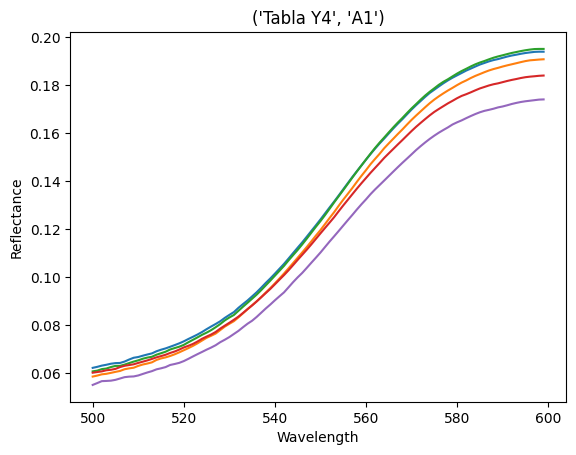

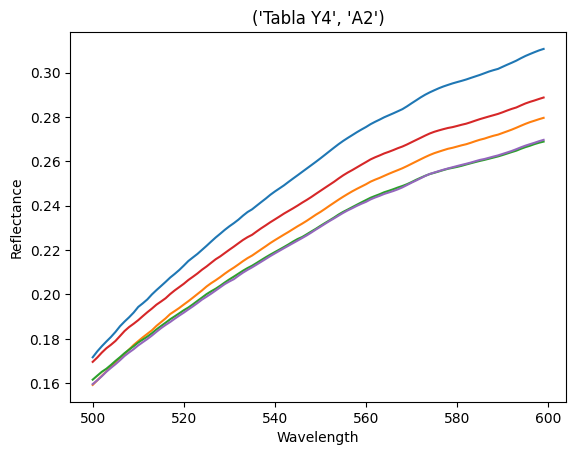

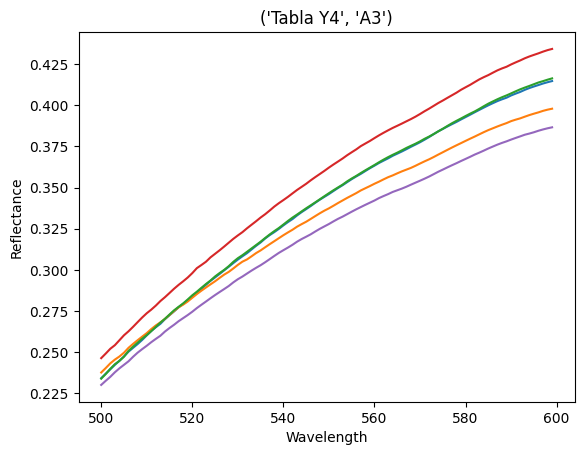

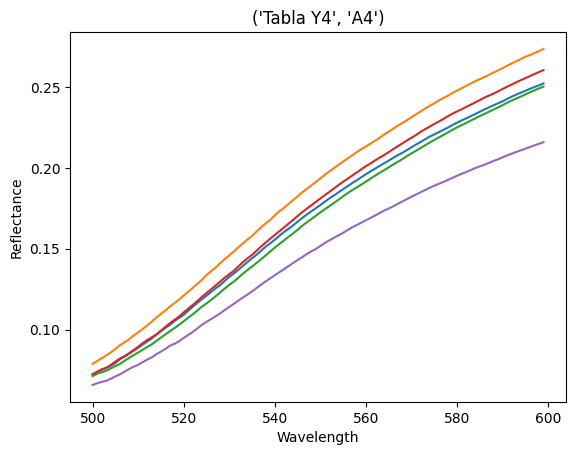

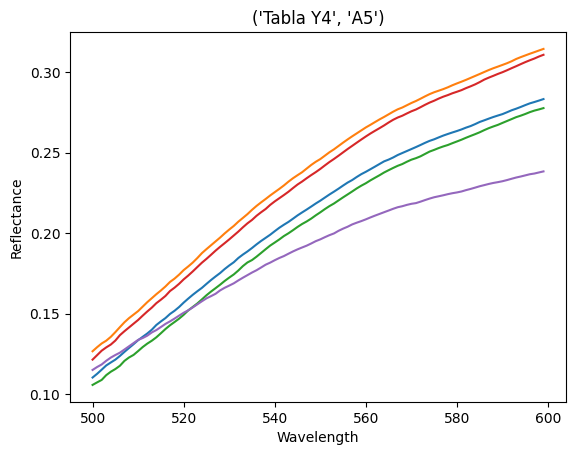

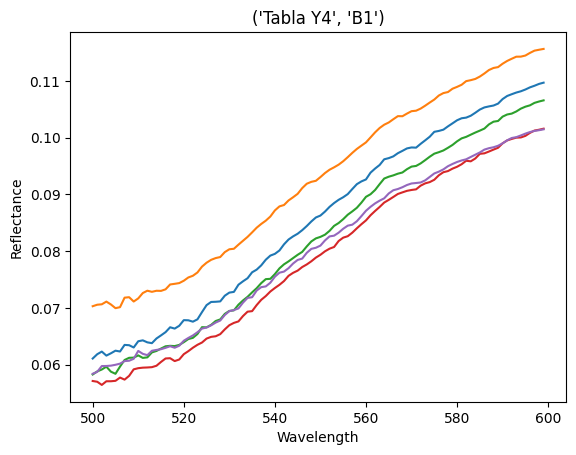

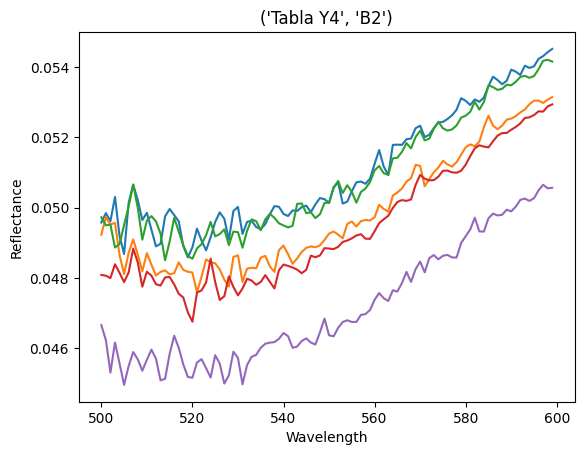

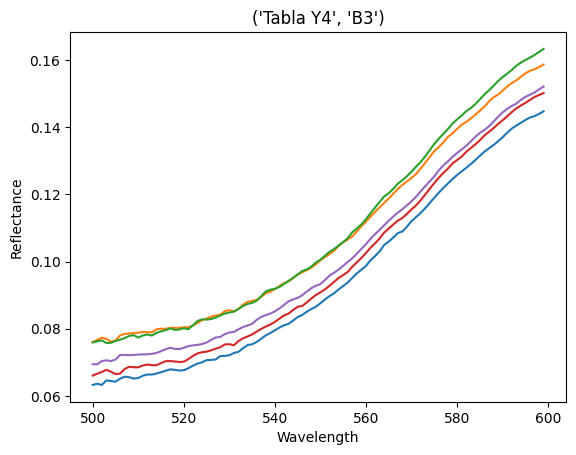

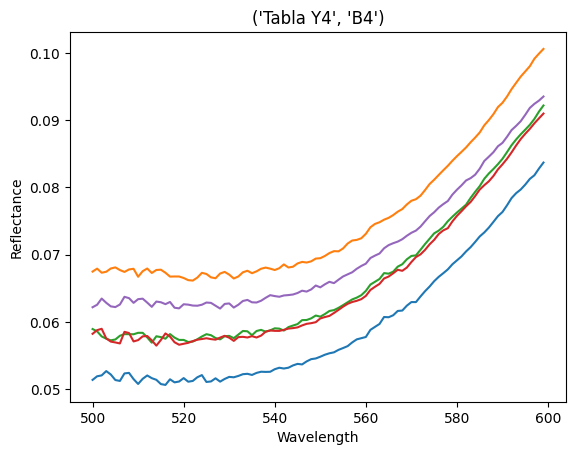

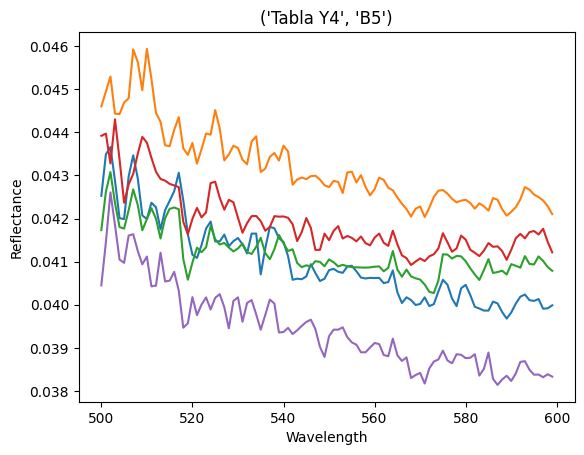

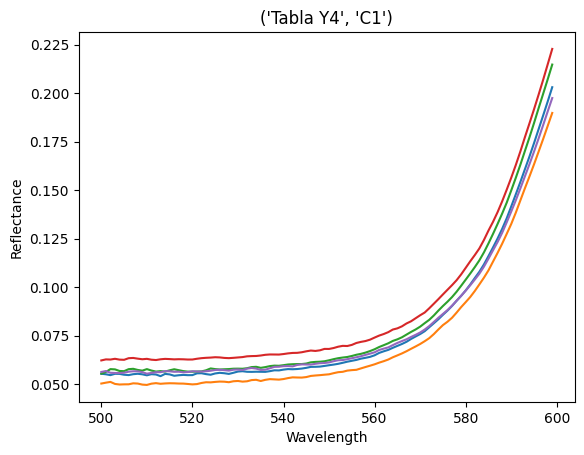

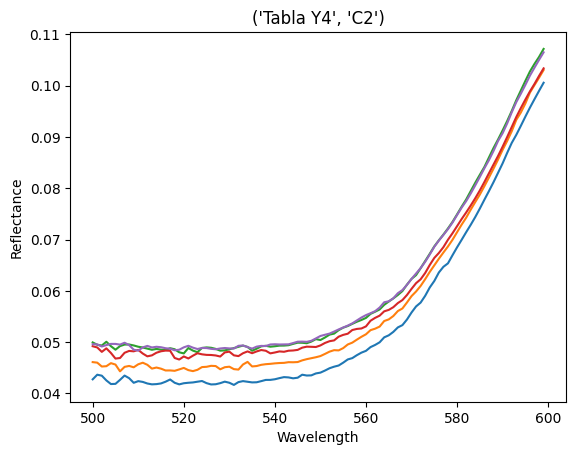

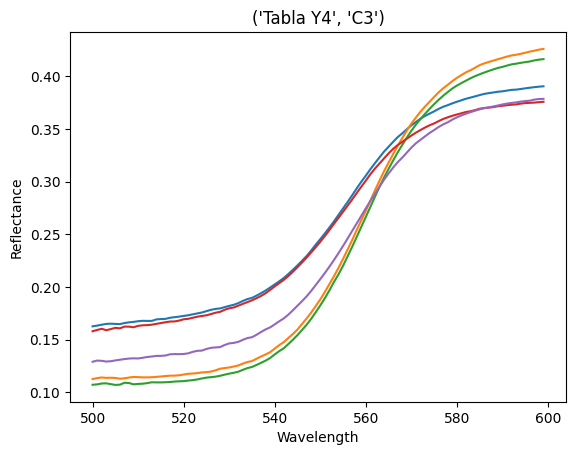

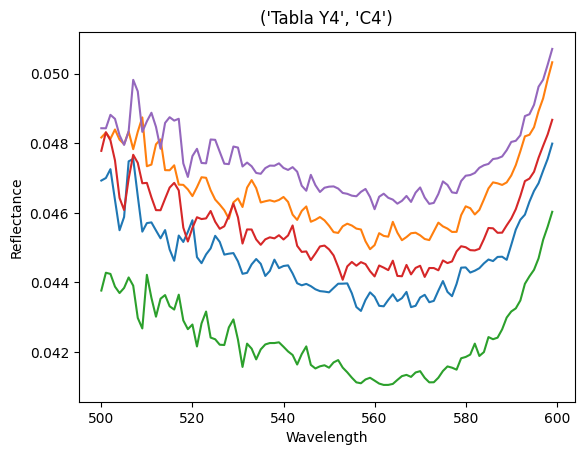

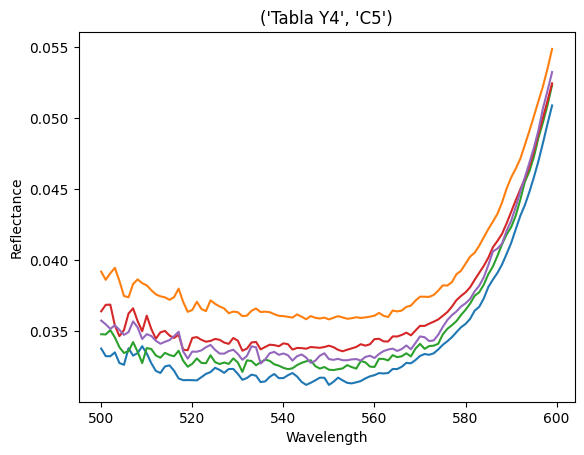

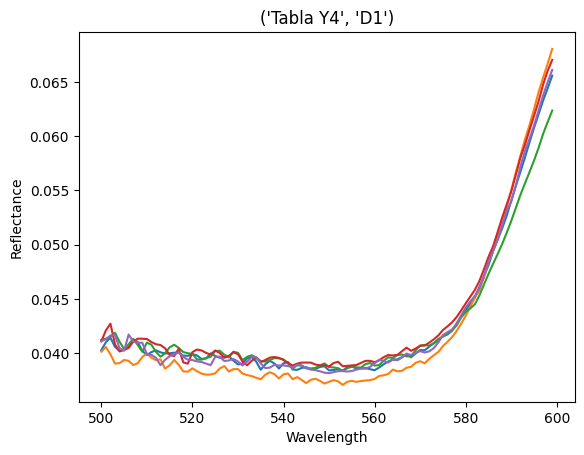

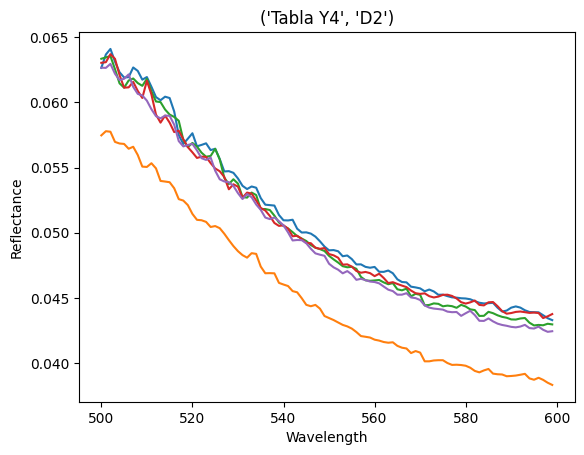

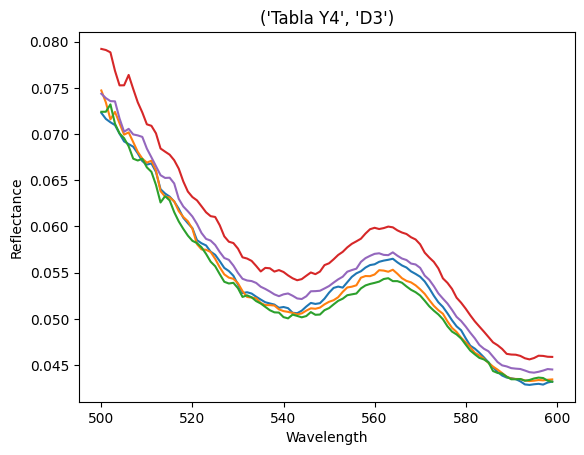

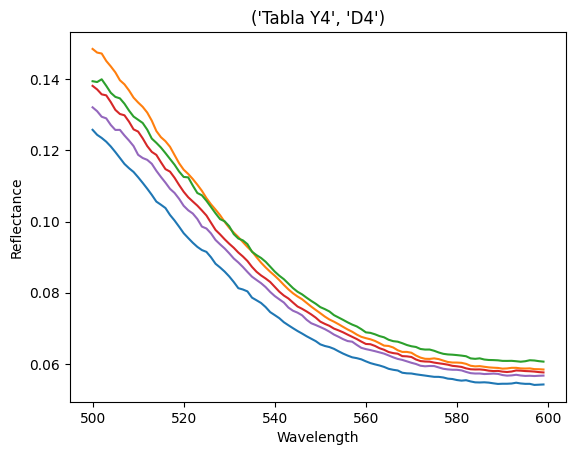

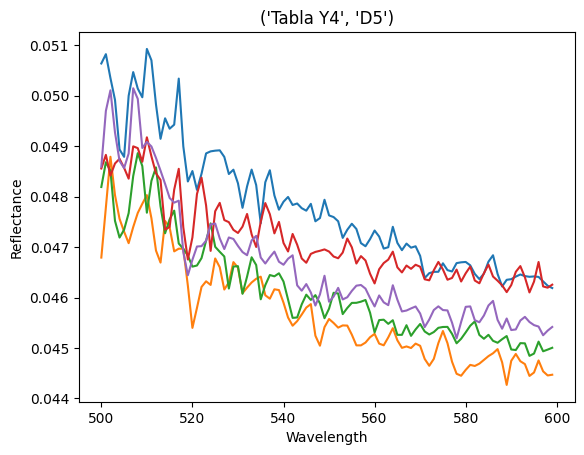

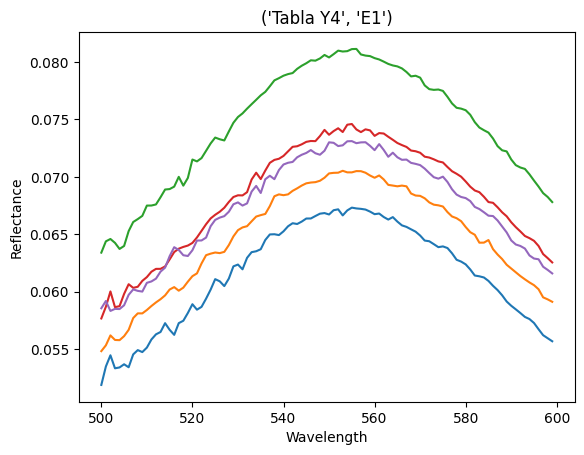

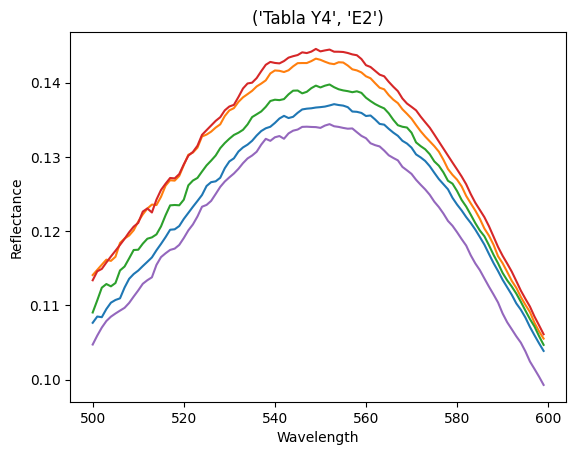

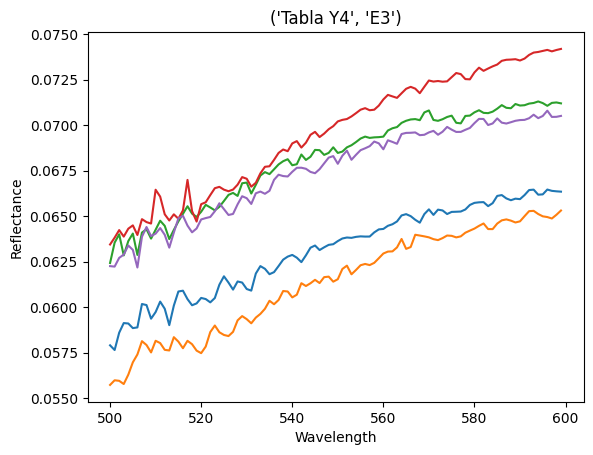

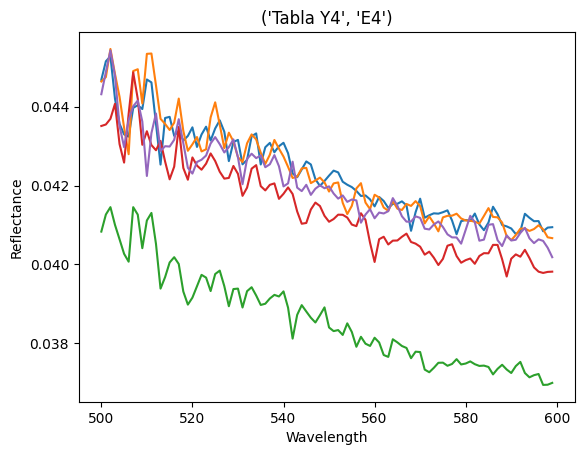

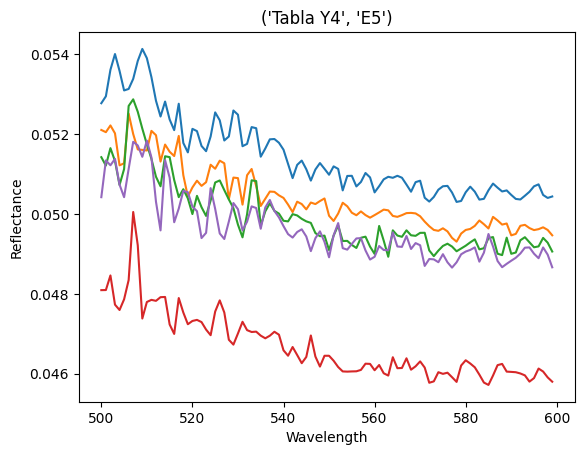

In [48]:
def imprimir_5_en_5():
    cont = 0
    aux = 0
    for f in specs_df[0:2]:
        dev_x = f['x'].to_numpy()
        dev_y = f['y'].to_numpy()
        plt.plot(dev_x, dev_y)
        aux+=1
        if aux == 5:
            aux=0
            plt.xlabel('Wavelength')
            plt.ylabel('Reflectance')
            t = "Tabla Y4",etiquetas[cont]
            plt.title(t)
            plt.show()
            cont+=1
imprimir_5_en_5()

In [ ]:
def imprime_todos():
    for f in specs_df:
        dev_x = f['x'].to_numpy()
        dev_y = f['y'].to_numpy()
        print(dev_y)
        plt.ylabel('Reflectance')
        plt.xlabel('Wavelength')
        t = "Tabla Y4"#,etiquetas[cont]
        plt.plot(dev_x, dev_y)
        plt.title(t)
        plt.show()
      
        cont+=1

In [49]:
#feature_names = data['feature_names']
feature_names = ['wavelength','reflectance']

#labels = np.concatenate((lista, lista))
#features=np.concatenate((features, features))
indexes = dev_x
labels = [i for i in range(25) for _ in range(5)]
print(len(labels))
print(len(features))

125
125


# Bayes ingenuo

In [50]:
temp_f=features
# Función auxiliar  Cuenta las diferencias entre dos listas y 
# muestra el índice donde son diferentes.
def show_differences(list1, list2):
  differences = {}
  for i in range(len(list1)):
    if list1[i] != list2[i]:
      differences[i] = [list1[i], list2[i]]
  return differences
features=temp_f

In [51]:
train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 1, random_state = 22
)

#print(train)
#print(test)
#print(train_labels)
#print(test_labels)


GNBclf = GaussianNB()

model = GNBclf.fit(train, train_labels)
print(len(model.classes_))
test=features[:125]
preds = GNBclf.predict(test)
print(preds)
print(show_differences(preds, labels))
print(GNBclf.score(test,labels))

25
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6 13  7  7  7  7  7  8  8  8  8  8  9 23  9
  9 23 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13  9 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23  9  9
 24 24 24 19 24]
{34: [13, 6], 46: [23, 9], 49: [23, 9], 67: [9, 13], 118: [9, 23], 119: [9, 23], 123: [19, 24]}
0.944


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, labels)

0.944

# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train, train_labels)
pb = reg.predict(test)
print(reg.score(train, train_labels))

len(pb)
for i in range(len(pb)):
    print("Predicción en",i," es ",round(pb[i],2))

print(show_differences(preds, labels))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=4000)
#make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(train, train_labels)
print(clf.score(train, train_labels))
print(clf.predict_proba(test))
print(clf.predict(test))

print(show_differences(preds, labels))

# Perceptron

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(train, train_labels)
Perceptron()
preds=clf.predict(train)
print(clf.score(train, train_labels))

print(show_differences(preds, labels))

# K-Nearest Neighbours


In [ ]:
size=len(indexes)
nlabels= list()
for e in etiquetas:
    er = [e for _ in range(5)]
    nlabels+=er

In [ ]:
i=0
# Concatenate Target values
for _ in range(125):
    tmp_class = [nlabels[i] for _ in range(size)]
    array_tmp = np.stack([indexes,features[i],tmp_class], axis=1)
    if i==0:
        y = np.array(array_tmp)
    else:
        y = np.concatenate((y,array_tmp))
    i+=1
np.array(y).shape
y

In [ ]:
# X Training data
for i in range(125):
    t = [2 for _ in range(size)]
    array_tmp = np.stack([features[i],t], axis=1)
    if i==0:
        X = np.array(array_tmp)
    else:
        X = np.concatenate((X,array_tmp))
np.array(X).shape
X

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classes = nlabels
neigh = KNeighborsClassifier()
neigh.classes_ = classes
neigh.n_features_in_=2
neigh.n_jobs=3

neigh.fit(X,y)

In [ ]:
def predecir(spec):
    t = [2 for _ in range(size)]
    array_X = np.stack([spec,t], axis=1)
    #array_X = i
    prediccion=neigh.predict(array_X)
    print("Prediccion=")
    print(prediccion)
    frec = {'A1':0,'A2':0,'A3':0,'A4':0,'A5':0,
                'B1':0,'B2':0,'B3':0,'B4':0,'B5':0,
                'C1':0,'C2':0,'C3':0,'C4':0,'C5':0,
                'D1':0,'D2':0,'D3':0,'D4':0,'D5':0,
                'E1':0,'E2':0,'E3':0,'E4':0,'E5':0,}
    for ren in prediccion:
        elem=ren[2]
        if elem in frec:
            frec[elem] +=1

    print("Probabilidad por clase: ")
    print(neigh.predict_proba(array_X))
    return frec

spec=features[0]
predi=predecir(spec)

In [ ]:
sum=0
for p in predi:
    ratio = predi[p]/size
    sum+=ratio
    print(p," :",(ratio*100))
sum